In [80]:
from qlearning_solver import QLearningSolver
from tester import Tester
import numpy as np

tester = Tester()

### Single Q-Learning agent trained

In [81]:
solver = QLearningSolver(tester.get_obs_size(), tester.get_act_size())

# Train the agent
q_table = solver.train(tester.step_f, tester.reset_f, num_episodes=5000, max_steps=100)

total_rewards = tester.evaluate(q_table)
# print(total_rewards)
print(f"Mean total reward (100 samples):             {np.mean(total_rewards)}")
print(f"Std deviation of total reward (100 samples): {np.std(total_rewards)}")

Mean total reward (100 samples):             -13.0
Std deviation of total reward (100 samples): 0.0


![Example Performance](../img/cliffwalking.gif)

Fig. 1 Example performance of agent that learned on 5000 episodes

### Single random agent solve

In [82]:
total_rewards = tester.evaluate_random_agent()
# print(total_rewards)
print(f"Mean total reward (100 samples):             {np.mean(total_rewards)}")
print(f"Std deviation of total reward (100 samples): {np.std(total_rewards)}")

Mean total reward (100 samples):             -1116.65
Std deviation of total reward (100 samples): 473.3320055732551


### Varying training episode amount

In [83]:
episode_num_list = [100, 250, 500, 700, 1000, 1200, 2500, 5000]
all_avgs = []
all_stds = []
AVERAGE_SIZE = 20

for episode_num in episode_num_list:
    avgs = []
    stds = []
    for _ in range(AVERAGE_SIZE):
        q_table = solver.train(tester.step_f, tester.reset_f, num_episodes=episode_num, max_steps=100)
        total_rewards = tester.evaluate(q_table)
        avgs.append(np.mean(total_rewards))
        stds.append(np.std(total_rewards))
    all_avgs.append(avgs)
    all_stds.append(stds)


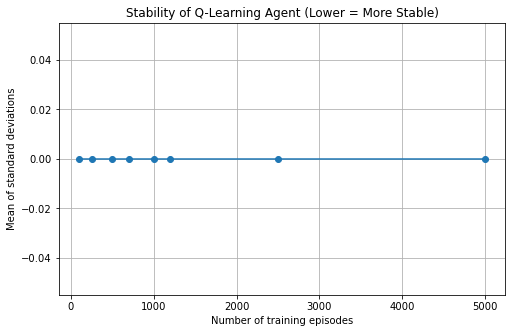

In [103]:
import matplotlib.pyplot as plt

mean_of_stdvs = [np.mean(stds) for stds in all_stds]

plt.figure(figsize=(8, 5))
plt.plot(episode_num_list, mean_of_stdvs, '-o')
plt.xlabel("Number of training episodes")
plt.ylabel("Mean of standard deviations")
plt.title("Stability of Q-Learning Agent (Lower = More Stable)")
plt.grid(True)
plt.show()


Agent achieved the same total reward across all episodes, suggesting deterministic behavior 

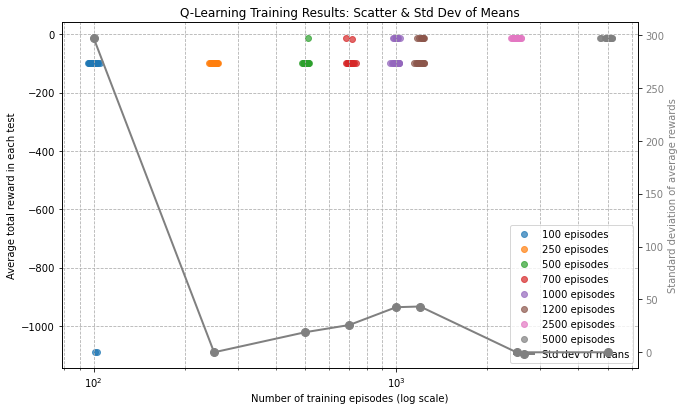

In [105]:
stddev_of_means = [np.std(avgs) for avgs in all_avgs]

fig, ax1 = plt.subplots(figsize=(10, 6), facecolor='white')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Scatter plot on primary y-axis
for i, episode_num in enumerate(episode_num_list):
    x = np.random.normal(loc=episode_num, scale=episode_num*0.02, size=AVERAGE_SIZE)
    ax1.scatter(x, all_avgs[i], alpha=0.7, label=f"{episode_num} episodes")
ax1.set_xscale('log')
ax1.set_xlabel("Number of training episodes (log scale)")
ax1.set_ylabel("Average total reward in each test")
ax1.grid(True, which="both", ls="--")

# Csecond y-axis for stddev_of_means
ax2 = ax1.twinx()
ax2.plot(episode_num_list, stddev_of_means, '-o', color='grey', linewidth=2, markersize=8, label='Std dev of means')
ax2.set_ylabel("Standard deviation of average rewards", color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='best')

plt.title("Q-Learning Training Results: Scatter & Std Dev of Means")
plt.show()


Minimum stable number of traning episodes = 5000

### Code generality showcase


Example usage on other of gymnasium library's game -changed game in tester class from tester.py

![Example Performance](../img/taxi.gif)